# Ciencia de datos aplicada (ITBA): Tercer Entregable

**Predicción de nuevos datos utilizando el mejor modelo entrenado**

**Equipo:** Gaston Francois - Nicolas Suarez Durrels - Franco Rupnik

**Nombre del proyecto**: Prophetario

# Entrenamiento de modelo de predicción de precios de propiedades

Este notebook tiene como objetivo entrenar un modelo de aprendizaje supervisado para predecir el precio de propiedades,
utilizando un conjunto de datos previamente preprocesado y almacenado en el archivo `dataset.csv`.

Se utilizarán dos modelos: uno simple y explicable (Regresión Lineal) y otro más robusto (Random Forest) para comparar resultados.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

sns.set_theme(style="whitegrid")

## Carga del dataset

In [51]:
df = pd.read_csv("dataset.csv")
print("Shape del dataset:", df.shape)
df.head()

Shape del dataset: (808, 14)


,Cantidad_plantas,antiguedad,dormitorios,cocheras,baños,ambientes,m2_totales,m2_cubiertos,expenses,price,Pileta_sí,Apto_credito_sí,vivienda_Departamento,vivienda_PH
0,0.0,0.16,0.500000,0.013889,0.333333,0.307692,0.320829,0.528336,0.000000,590000.0,0.0,0.0,0.0,0.0
1,0.0,0.40,0.333333,0.013889,0.000000,0.230769,0.058243,0.133455,0.185792,152000.0,0.0,0.0,1.0,0.0
2,1.0,0.01,0.333333,0.013889,0.333333,0.230769,0.896347,0.376600,0.437158,380000.0,1.0,0.0,0.0,0.0
3,0.0,0.00,0.666667,0.027778,1.000000,0.461538,0.461007,0.760512,0.000000,459900.0,0.0,0.0,0.0,0.0
4,0.0,0.50,0.333333,0.013889,0.166667,0.230769,0.123396,0.261426,0.273224,180000.0,0.0,0.0,1.0,0.0


## Preparación de los datos

In [52]:
X = df.drop(columns=["price"])
y = df["price"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento con Regresión Lineal

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 58854.85
MSE: 6483075476.52
RMSE: 80517.55
R^2: 0.48


## Evaluación del modelo de Regresión Lineal

## Visualización: Precio real vs. predicho

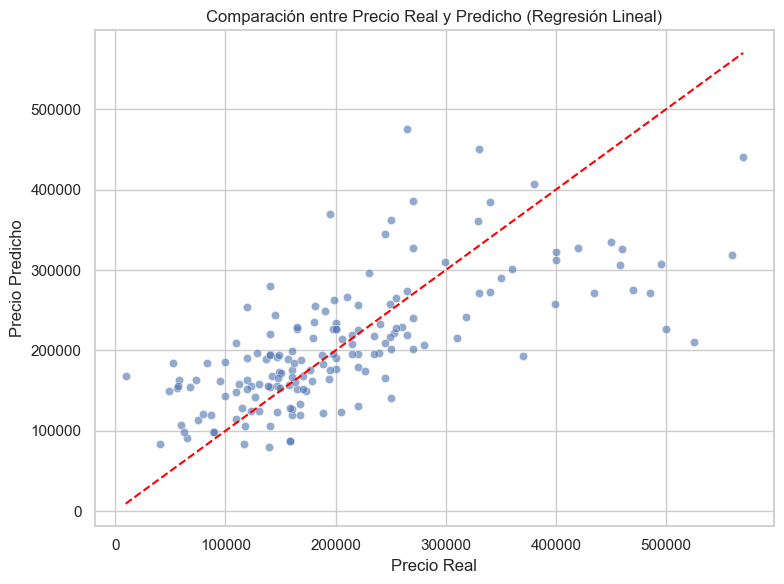

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre Precio Real y Predicho (Regresión Lineal)")
plt.tight_layout()
plt.show()

## Comparativa con Random Forest

In [56]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R^2: {r2_rf:.2f}")

Random Forest MAE: 50144.38
Random Forest MSE: 5443768984.97
Random Forest RMSE: 73781.90
Random Forest R^2: 0.56


## Comparativa con LightGBM


In [57]:

# ## Comparativa con LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42, verbose=-1)
callbacks = [
    lgb.early_stopping(stopping_rounds=10, verbose=False),
    lgb.log_evaluation(period=0)
]

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_names=['train', 'valid'],
    eval_metric='l1',
    callbacks=callbacks
)

y_lgb_pred = lgb_model.predict(X_test)

mae_lgb = mean_absolute_error(y_test, y_lgb_pred)
mse_lgb = mean_squared_error(y_test, y_lgb_pred)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_lgb_pred)

print(f"LightGBM MAE: {mae_lgb:.2f}")
print(f"LightGBM MSE: {mse_lgb:.2f}")
print(f"LightGBM RMSE: {rmse_lgb:.2f}")
print(f"LightGBM R^2: {r2_lgb:.2f}")


LightGBM MAE: 49725.77
LightGBM MSE: 5023245439.67
LightGBM RMSE: 70874.86
LightGBM R^2: 0.59


## Comparación visual de modelos

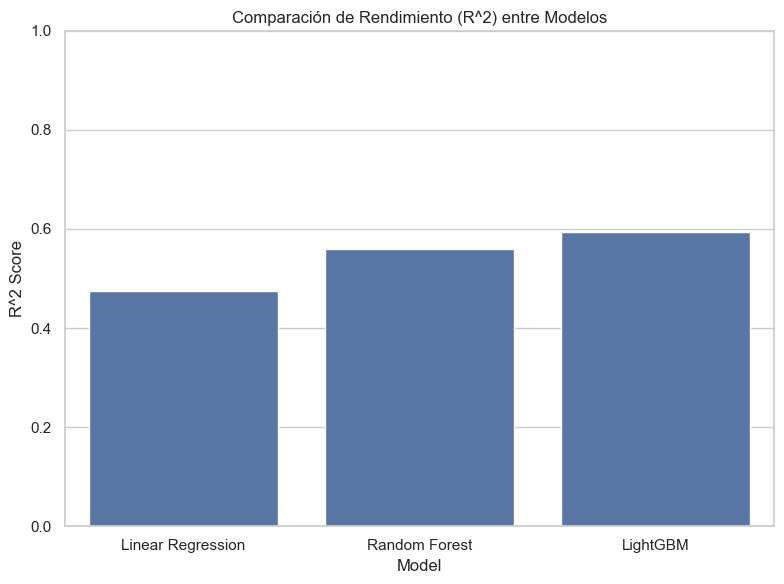

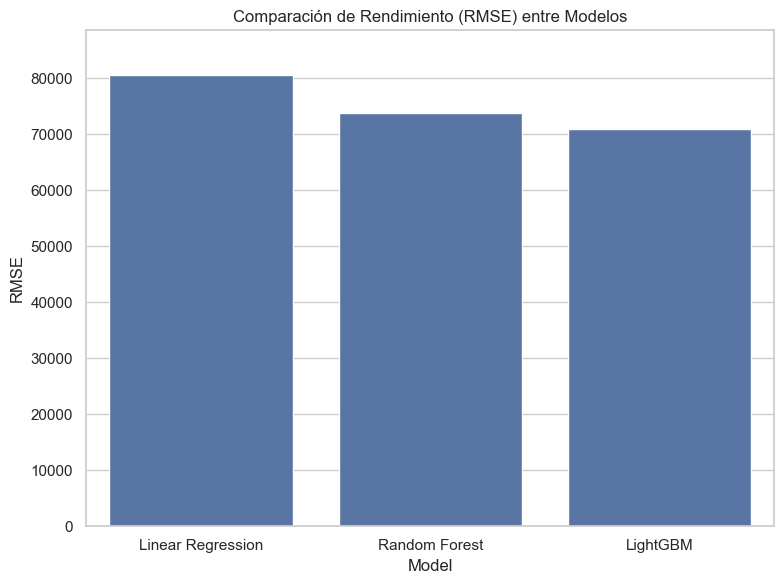

In [58]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'LightGBM'],
                        'R^2': [r2, r2_rf, r2_lgb]})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='R^2', data=results)
plt.ylabel("R^2 Score")
plt.title("Comparación de Rendimiento (R^2) entre Modelos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

#Now with RMSE
results_rmse = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'LightGBM'],
                              'RMSE': [rmse, rmse_rf, rmse_lgb]})
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data=results_rmse)
plt.ylabel("RMSE")
plt.title("Comparación de Rendimiento (RMSE) entre Modelos")
plt.ylim(0, results_rmse['RMSE'].max() * 1.1)
plt.tight_layout()
plt.show()

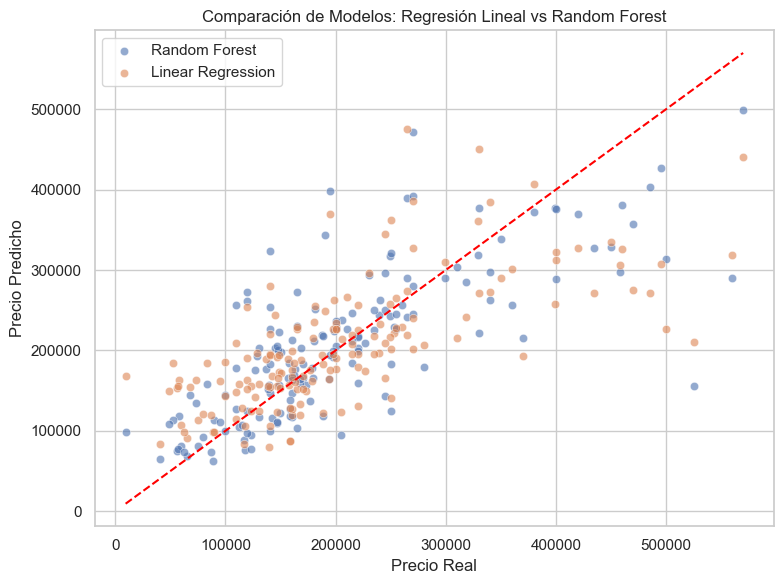

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_rf_pred, alpha=0.6, label="Random Forest")
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label="Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación de Modelos: Regresión Lineal vs Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

# Espacio de búsqueda para Random Forest
rf_space = {
    'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
    'max_depth': hp.choice('max_depth', range(3, 21)),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.2),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.2)
}

def rf_objective(params):
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=42,
        n_jobs=-1
    )
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Espacio de búsqueda para LightGBM
lgb_space = {
    'num_leaves': hp.choice('num_leaves', range(20, 150)),
    'max_depth': hp.choice('max_depth', range(3, 21)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
    'min_child_samples': hp.choice('min_child_samples', range(5, 50))
}

def lgb_objective(params):
    model = lgb.LGBMRegressor(
        num_leaves=int(params['num_leaves']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        min_child_samples=int(params['min_child_samples']),
        random_state=42,
        n_jobs=-1
    )
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Optimización Random Forest
rf_trials = Trials()
best_rf = fmin(fn=rf_objective, space=rf_space, algo=tpe.suggest, max_evals=30, trials=rf_trials)
print("Mejores hiperparámetros Random Forest:", best_rf)

# Optimización LightGBM
lgb_trials = Trials()
best_lgb = fmin(fn=lgb_objective, space=lgb_space, algo=tpe.suggest, max_evals=30, trials=lgb_trials)
print("Mejores hiperparámetros LightGBM:", best_lgb)

100%|██████████| 30/30 [00:09<00:00,  3.24trial/s, best loss: 70954.10216224134]
Mejores hiperparámetros Random Forest: {'max_depth': np.int64(9), 'min_samples_leaf': np.float64(0.010646480354851173), 'min_samples_split': np.float64(0.03944243338940538), 'n_estimators': np.int64(2)}
100%|██████████| 30/30 [00:01<00:00, 22.34trial/s, best loss: 71365.25692477512]
Mejores hiperparámetros LightGBM: {'learning_rate': np.float64(0.022803797609390077), 'max_depth': np.int64(2), 'min_child_samples': np.int64(4), 'n_estimators': np.int64(4), 'num_leaves': np.int64(118)}


In [61]:
#RMSE de los mejores modelos
rf_model = RandomForestRegressor(
    n_estimators=int(best_rf['n_estimators']),
    max_depth=int(best_rf['max_depth']),
    min_samples_split=best_rf['min_samples_split'],
    min_samples_leaf=best_rf['min_samples_leaf'],
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))

lgb_model = lgb.LGBMRegressor(
    num_leaves=int(best_lgb['num_leaves']),
    max_depth=int(best_lgb['max_depth']),
    learning_rate=best_lgb['learning_rate'],
    n_estimators=int(best_lgb['n_estimators']),
    min_child_samples=int(best_lgb['min_child_samples']),
    random_state=42,
    n_jobs=-1
)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_y_pred))

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"LightGBM RMSE: {lgb_rmse:.2f}")

Random Forest RMSE: 77843.66
LightGBM RMSE: 107532.11
